In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
path = './school_data/'

In [3]:
school = pd.read_csv(path+'위해지표_전처리_출입금지(200m).csv')
school.head(10)
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   학교명                 320 non-null    object 
 1   학교코드                320 non-null    object 
 2   지역                  320 non-null    object 
 3   법정동코드               320 non-null    int64  
 4   위도                  320 non-null    float64
 5   경도                  320 non-null    float64
 6   개최횟수                320 non-null    int64  
 7   심의건수                320 non-null    int64  
 8   학교장의 자체해결건수         320 non-null    int64  
 9   피해학생수               320 non-null    int64  
 10  피해학생_보호조치건수         320 non-null    int64  
 11  가해학생수               320 non-null    int64  
 12  선도·교육
조치건수          320 non-null    int64  
 13  신체폭력                320 non-null    int64  
 14  언어폭력                320 non-null    int64  
 15  금품갈취                320 non-null    int64  
 16  강요      

In [4]:
school_info = school[['학교코드','학교명','지역','법정동코드','위도','경도']]
df = school.iloc[:,6:]
labels= np.array(school['학교코드'])

In [5]:
df.corr()

,개최횟수,심의건수,학교장의 자체해결건수,피해학생수,피해학생_보호조치건수,가해학생수,선도·교육\n조치건수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,학교폭력유형건수_합계,200미터내_청소년출입금지업소개수
개최횟수,1.000000,0.657802,0.361863,0.558343,0.416174,0.535145,0.543969,0.597475,0.358901,0.198729,0.224753,0.191970,0.328218,0.236426,0.038156,0.613103,-0.010517
심의건수,0.657802,1.000000,0.545479,0.714648,0.550975,0.710222,0.672056,0.725236,0.493437,0.245761,0.394138,0.336648,0.445430,0.358849,0.103229,0.816773,-0.019904
학교장의 자체해결건수,0.361863,0.545479,1.000000,0.468200,0.379631,0.401913,0.375402,0.444303,0.314859,0.168255,0.455615,0.333571,0.232731,0.225357,0.064213,0.541419,-0.015814
피해학생수,0.558343,0.714648,0.468200,1.000000,0.801331,0.710578,0.670935,0.590542,0.413154,0.251098,0.478213,0.351087,0.445020,0.395398,0.094197,0.736382,-0.064370
피해학생_보호조치건수,0.416174,0.550975,0.379631,0.801331,1.000000,0.571813,0.583642,0.481926,0.394817,0.205837,0.418531,0.416336,0.359587,0.283404,0.113385,0.635212,-0.054803
가해학생수,0.535145,0.710222,0.401913,0.710578,0.571813,1.000000,0.884803,0.663406,0.505229,0.250123,0.319188,0.294078,0.390969,0.276046,0.098494,0.750871,-0.030659
선도·교육\n조치건수,0.543969,0.672056,0.375402,0.670935,0.583642,0.884803,1.000000,0.676578,0.507559,0.294954,0.301998,0.240097,0.432791,0.257744,0.081542,0.759752,-0.014678
신체폭력,0.597475,0.725236,0.444303,0.590542,0.481926,0.663406,0.676578,1.000000,0.453201,0.429416,0.236045,0.123324,0.306680,0.127943,-0.001797,0.853334,-0.034809
언어폭력,0.358901,0.493437,0.314859,0.413154,0.394817,0.505229,0.507559,0.453201,1.000000,0.122855,0.270585,0.184536,0.155812,0.111663,-0.005535,0.695545,-0.018390
금품갈취,0.198729,0.245761,0.168255,0.251098,0.205837,0.250123,0.294954,0.429416,0.122855,1.000000,0.250517,0.059202,0.149296,0.047487,0.038735,0.462641,-0.001083


In [6]:
# model 사용변수 선정

df = df[['학교폭력유형건수_합계','200미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력']]

***
## K-Means Clustering

In [7]:
# 표준화
sd = StandardScaler()
df_sd = pd.DataFrame(sd.fit_transform(df))
df_sd.index = labels

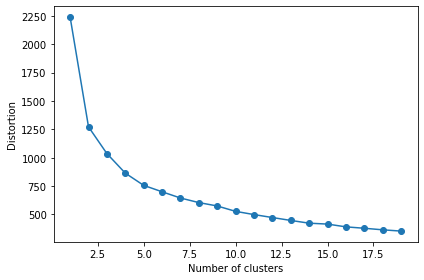

In [8]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,init='k-means++',
           n_init=10, max_iter=300, random_state=0)
    k.fit(df_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [9]:
df_sd_arr = df_sd.values

#k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters = 5,random_state=2021).fit(df_sd_arr)
kmeans.cluster_centers_

array([[ 0.12953493, -0.25714404,  0.06236052,  0.26372558,  0.10566001,
         0.22099901,  0.07989262],
       [-0.65424484, -0.21453466, -0.49292517, -0.69178331, -0.59800315,
        -0.6724796 , -0.60860404],
       [ 2.74800148,  0.08053728,  2.43392167,  2.67811467,  2.70063255,
         2.3678465 ,  2.3461424 ],
       [-0.38071876,  2.65610458, -0.34080434, -0.31443582, -0.29183868,
        -0.26330787, -0.49388609],
       [ 1.29723657, -0.15436313,  0.94816253,  1.06439478,  1.10129511,
         1.2105605 ,  1.50220628]])

In [10]:
df_sd['cluster'] = kmeans.labels_
df_sd

,0,1,2,3,4,5,6,cluster
S010000373,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1
S010000375,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,4
S010000376,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1
S000003540,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1
S010000581,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,0
...,...,...,...,...,...,...,...,...
S010000436,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0
S010000585,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,1
S010005523,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,0
S010000592,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2


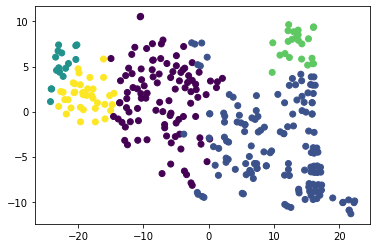

In [11]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_sd.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [12]:
df_sd.reset_index(inplace=True)
df_sd.rename(columns={'index':'학교코드',0:'학교폭력유형_계',1:'200미터내_청소년출입금지업소개수',2:'개최횟수',3:'심의건수',4:'피해학생수',5:'가해학생수',6:'신체폭력'},inplace=True)

In [13]:
df_sd['cluster'].value_counts()

1    145
0    100
4     36
3     23
2     16
Name: cluster, dtype: int64

In [14]:
hazard = pd.merge(school_info, df_sd, on='학교코드', how='left')
# final.head()

In [15]:
hazard_score = hazard[['학교폭력유형_계','200미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력','cluster']].groupby('cluster').mean()
# final_score = final.groupby('cluster').mean()
hazard_score

,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력
cluster,,,,,,,
0,0.129535,-0.257144,0.062361,0.263726,0.105660,0.220999,0.079893
1,-0.654245,-0.214535,-0.492925,-0.691783,-0.598003,-0.672480,-0.608604
2,2.748001,0.080537,2.433922,2.678115,2.700633,2.367847,2.346142
3,-0.380719,2.656105,-0.340804,-0.314436,-0.291839,-0.263308,-0.493886
4,1.297237,-0.154363,0.948163,1.064395,1.101295,1.210561,1.502206


In [16]:
tmp = hazard[hazard['cluster']==0]
tmp['지역'].nunique()

25

***
## 결과 해석

* **cluster 2 > cluster1 > cluster0**

- cluster 0 : 학교폭력 발생 건수가 낮고, 200m 내 청소년 유해업소수가 많음
- cluster 1 : 학교폭력 발생 건수가 약간 높음, 200m 내 청소년 유해업소수가 적음
- cluster 2 : 학교폭력 발생 건수가 전체적으로 높음, 200m 내 청소년 유해업소수가 상대적으로 많음
***
* **cluster 2 > cluster 4 > cluster 0 > cluster 3 > cluster 1**

***
## 위해지표 점수 산출

### 1차 점수

In [19]:
rank = hazard_score.sort_values('심의건수').index
rank

Int64Index([1, 3, 0, 4, 2], dtype='int64', name='cluster')

In [20]:
hazard['score_1st'] = ''

In [21]:
for i in range(len(hazard)):
    if hazard['cluster'][i]==rank[0]:
        hazard['score_1st'][i]=0.2
    elif hazard['cluster'][i]==rank[1]:
        hazard['score_1st'][i]=0.4
    elif hazard['cluster'][i]==rank[2]:
        hazard['score_1st'][i]=0.6
    elif hazard['cluster'][i]==rank[3]:
        hazard['score_1st'][i]=0.8
    elif hazard['cluster'][i]==rank[3]:
        hazard['score_1st'][i]=1

In [22]:
hazard

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,4,0.8
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0,0.6
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,1,0.2
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,0,0.6
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2,


### 2차 점수

In [23]:
df = pd.read_csv(path+'서울시고등학교_기본정보.csv', encoding = 'cp949')
df = df[['지역','학교코드','학교명','학급당 학생수','수업 교원 1인당 학생수']]

In [24]:
hazard_2nd = pd.merge(hazard,df[['학교코드','수업 교원 1인당 학생수']],how='left',on='학교코드')
hazard_2nd

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st,수업 교원 1인당 학생수
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2,10.9
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,4,0.8,13.5
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2,13.6
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,1,0.2,10.8
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,0,0.6,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0,0.6,11.4
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,1,0.2,10.3
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,0,0.6,9.8
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2,,6.8
